In [3]:
%pip install matplotlib pandas

import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
Note: you may need to restart the kernel to use updated packages.


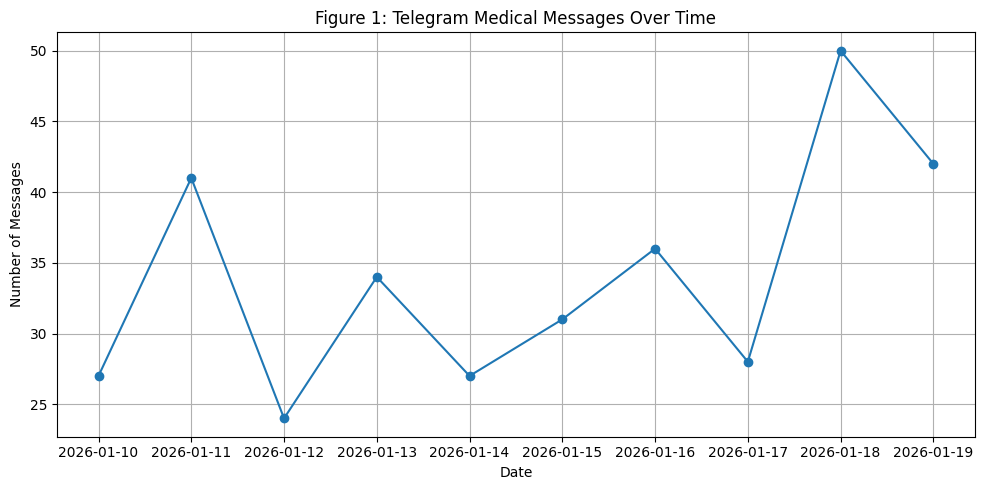

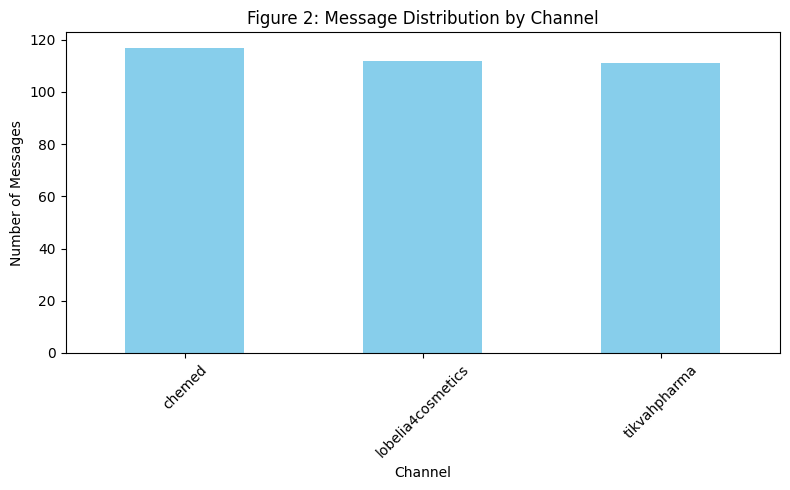

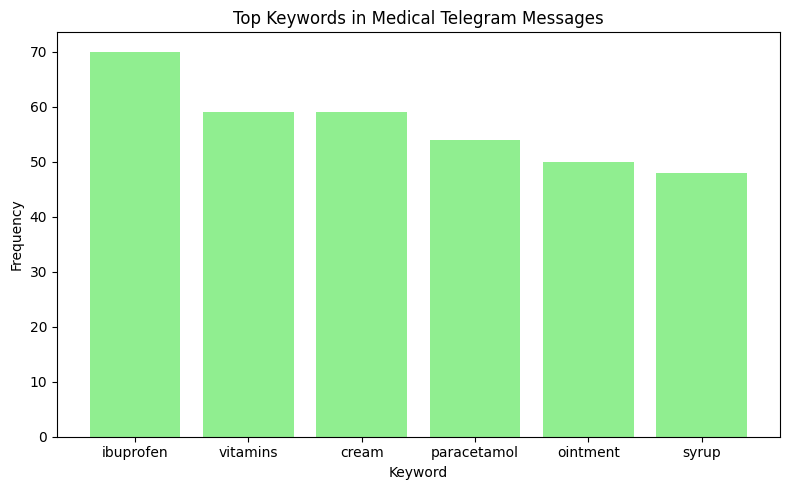

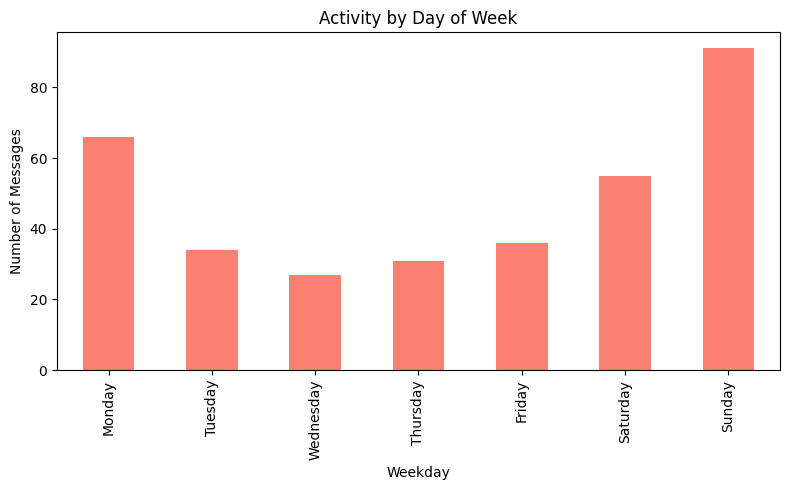

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import Counter

# ----------------------------
# Step 1: Generate Mock Data
# ----------------------------
channels = ["tikvahpharma", "chemed", "lobelia4cosmetics"]
num_days = 10

dates = [datetime.today() - timedelta(days=i) for i in range(num_days)]

data = []
for channel in channels:
    for date in dates:
        # Random number of messages per day
        for _ in range(np.random.randint(5, 20)):
            # Random "text" with some keywords
            text = np.random.choice([
                "paracetamol", "ibuprofen", "vitamins", "cream", "syrup", "ointment"
            ])
            data.append({
                "channel": channel,
                "date": date,
                "text": text
            })

df = pd.DataFrame(data)

# Ensure date is proper datetime
df["date"] = pd.to_datetime(df["date"])

# ----------------------------
# 6.1 Proposed Visualization 1
# Messages Over Time
# ----------------------------
messages_per_day = df.groupby(df["date"].dt.date).size()

plt.figure(figsize=(10,5))
messages_per_day.plot(kind="line", marker='o')
plt.title("Figure 1: Telegram Medical Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 6.1 Proposed Visualization 2
# Messages by Channel
# ----------------------------
messages_by_channel = df["channel"].value_counts()

plt.figure(figsize=(8,5))
messages_by_channel.plot(kind="bar", color="skyblue")
plt.title("Figure 2: Message Distribution by Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 6.1 Proposed Visualization 3
# Keyword Frequency Analysis
# ----------------------------
all_text = " ".join(df["text"].tolist())
words = all_text.split()
word_counts = Counter(words)
top_words = dict(word_counts.most_common(6))

plt.figure(figsize=(8,5))
plt.bar(top_words.keys(), top_words.values(), color="lightgreen")
plt.title("Top Keywords in Medical Telegram Messages")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ----------------------------
# 6.1 Proposed Visualization 4
# Activity by Day of Week
# ----------------------------
df["day_of_week"] = df["date"].dt.day_name()
messages_by_weekday = df.groupby("day_of_week").size().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(8,5))
messages_by_weekday.plot(kind="bar", color="salmon")
plt.title("Activity by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.show()


In [5]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])


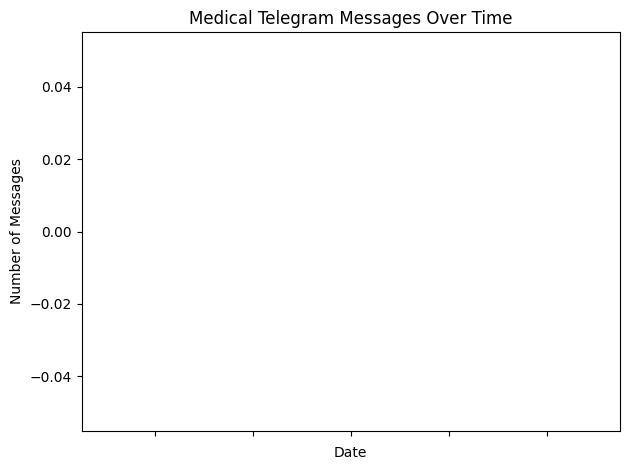

In [11]:
messages_per_day = df.groupby(df["date"].dt.date).size()

plt.figure()
messages_per_day.plot()
plt.title("Medical Telegram Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.show()
